Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ MSSubClass: The building class
+ MSZoning: The general zoning classification
+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ Street: Type of road access
+ Alley: Type of alley access
+ LotShape: General shape of property
+ LandContour: Flatness of the property
+ Utilities: Type of utilities available
+ LotConfig: Lot configuration
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)
+ BldgType: Type of dwelling
+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date
+ RoofStyle: Type of roof
+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)
+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet
+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior
+ Foundation: Type of foundation
+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area
+ Heating: Type of heating
+ HeatingQC: Heating quality and condition
+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality
+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition
+ PavedDrive: Paved driveway
+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet
+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: $Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

## Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.
 (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load the data
train = pd.read_csv('data/house_train.csv', index_col='Id')
test = pd.read_csv('data/house_test.csv', index_col='Id')
print(train.describe())
print(train.info())
train.head()

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


<Axes: >

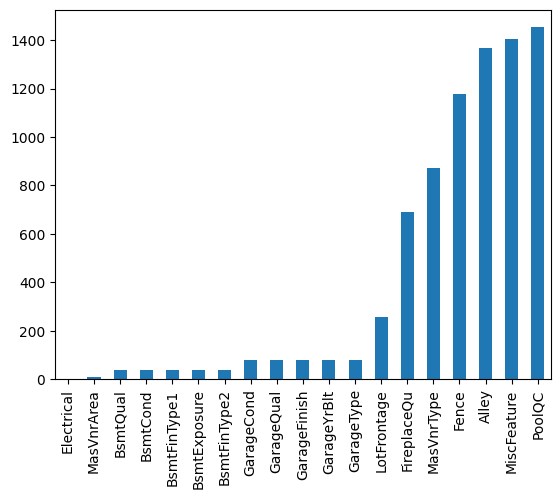

In [5]:
# Check misssing data
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
print(missing)
missing.plot.bar()

In [11]:
# Feature engineering
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# # Fill missing data in object columns with 'Unknown'
# object_columns = [col for col in X.select_dtypes(include=['object']).columns]
# X[object_columns] = X[object_columns].fillna('Unknown')
# 
# # Fill missing data in numerical columns with 0
# numerical_columns = [col for col in X.select_dtypes(exclude=['int', 'float']).columns]
# X[numerical_columns] = X[numerical_columns].fillna(0)
# 
# # Check missing data
# missing = X.isnull().sum()
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# print(missing)

In [37]:
from sklearn.feature_selection import mutual_info_regression
# Inspect MI 

# MI Scores functions
def make_mi_scores(_X, _y, _discrete_features):
    _mi_scores = mutual_info_regression(_X, _y, discrete_features=_discrete_features)
    _mi_scores = pd.Series(_mi_scores, name="MI Scores", index=X.columns)
    _mi_scores = _mi_scores.sort_values(ascending=False)
    return _mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    # vertical label doesn't fit to height need to auto fit
    plt.tight_layout()
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

OverallQual     0.567565
Neighborhood    0.492763
GrLivArea       0.483336
GarageCars      0.378155
TotalBsmtSF     0.369370
                  ...   
3SsnPorch       0.000000
MiscFeature     0.000000
Condition2      0.000000
Functional      0.000000
Street          0.000000
Name: MI Scores, Length: 79, dtype: float64


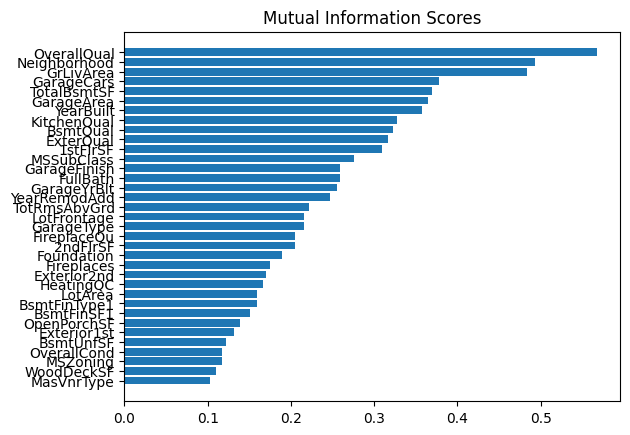

In [41]:
MI_x = train.copy()

MI_x.fillna(0, inplace=True)

MI_y = MI_x['SalePrice']
MI_x.drop('SalePrice', inplace=True, axis=1)

# transform object columns to category
for col in MI_x.select_dtypes(include=['object']):
    MI_x[col], _ = MI_x[col].factorize()
    
discrete_features = MI_x.dtypes == int

mi_scores = make_mi_scores(MI_x, MI_y, discrete_features)
print(mi_scores)

# find columns with 0 value 
top = mi_scores[mi_scores > 0.1]

plot_mi_scores(top)

In [ ]:
# check columns which can be transformed into category type
cat_columns = [col for col in X.select_dtypes(include=['object']).columns if X[col].nunique() < 10]
print(cat_columns)